# Pymaceuticals Inc.
---

### Analysis

- Both Capomulin and Ramicane were the most tested on mice against all of the other Drug Regimens with Propiva having the least testing.
- Capomulin and Ramicane have the lowest average tumor size amongst all of the other Drug Regimens
- Capomulin specifically should be used to reduce the size of tumors. Ramicane should also be used.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
full_study = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
full_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(full_study["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = full_study.loc[full_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_info = full_study.loc[full_study["Mouse ID"] == "g989"]
duplicate_mice_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_full_study = full_study[full_study["Mouse ID"].isin(duplicate_mice) == False]
clean_full_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_full_study["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean1 = clean_full_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median1 = clean_full_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance1 = clean_full_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
standardDev1 = clean_full_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem1 = clean_full_study.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean Tumor Volume": mean1,
                           "Median Volume": median1,
                           "Tumor Volume Variance": variance1,
                           "Tumor Volume Standard Deviation": standardDev1,
                           "Tumor Volume Standard Error": sem1})

summary_df

,Mean Tumor Volume,Median Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_df2 = clean_full_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean","median","var","std","sem"]})

summary_df2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

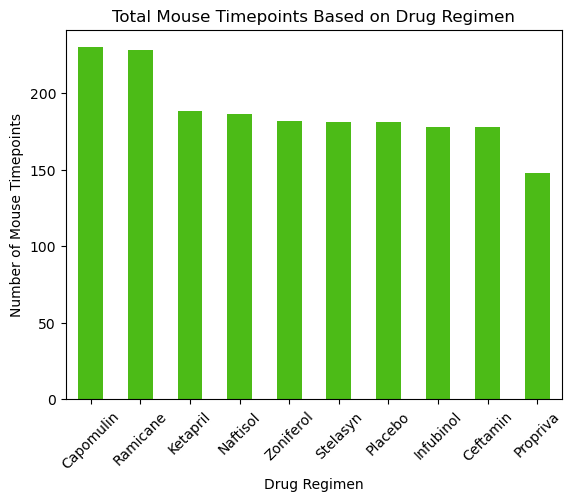

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
totals = clean_full_study["Drug Regimen"].value_counts()
totals.plot(kind = "bar", color="#4CBB17")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Number of Mouse Timepoints")
plt.title("Total Mouse Timepoints Based on Drug Regimen")
plt.show()

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

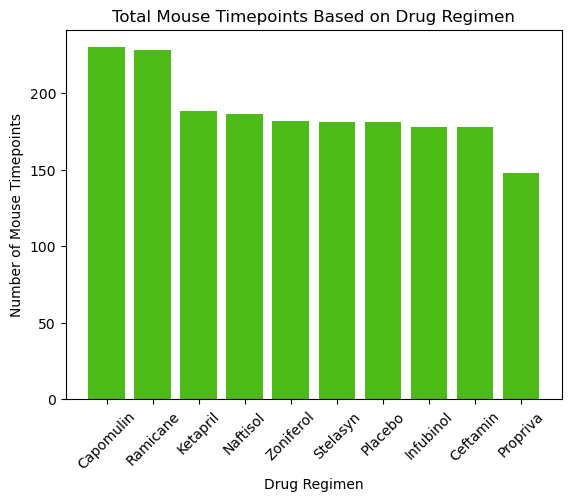

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
totals = clean_full_study["Drug Regimen"].value_counts()
plt.bar(totals.index.values,totals.values,color="#4CBB17")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 45)
plt.ylabel("Number of Mouse Timepoints")
plt.title("Total Mouse Timepoints Based on Drug Regimen")
plt.bar

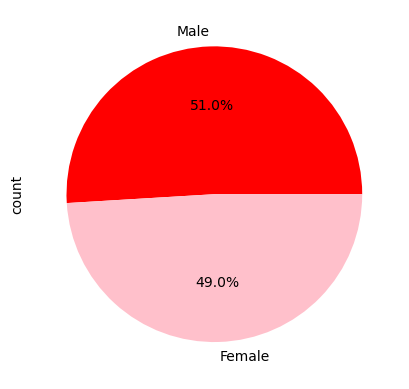

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
totals = clean_full_study.Sex.value_counts()
totals.plot(kind = "pie", autopct = "%1.1f%%", colors = ["red","pink"])
plt.show()

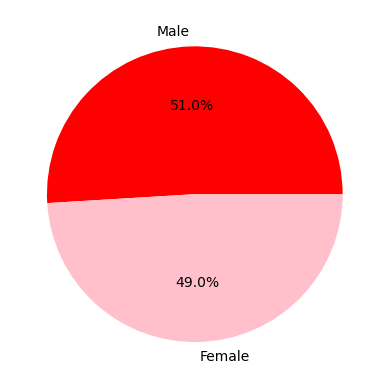

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
totals = clean_full_study.Sex.value_counts()
plt.pie(totals.values, labels = totals.index.values,autopct = "%1.1f%%", colors = ["red","pink"])
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = clean_full_study.groupby(["Mouse ID"])["Timepoint"].max()
greatest_tumor = greatest_tumor.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = greatest_tumor.merge(clean_full_study, on = ["Mouse ID","Timepoint"], how = "left")


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regiments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_regiments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    greatest_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_list.append(greatest_tumor_volume)
    
    # Determine outliers using upper and lower bounds
    quartiles = greatest_tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = greatest_tumor_volume.loc[(greatest_tumor_volume < lower_bound) | (greatest_tumor_volume > upper_bound)]
    print(f"{drug} has the following potential outliers: {outliers}")
    
    

Capomulin has the following potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane has the following potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol has the following potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin has the following potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Tumor Volume for Each Treament Group')

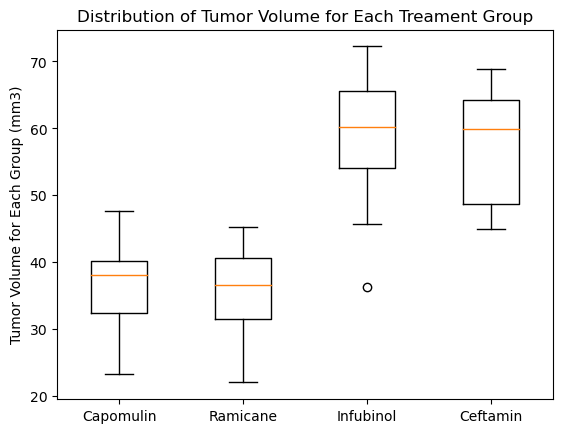

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_list, labels = treatment_regiments)
plt.ylabel('Tumor Volume for Each Group (mm3)')
plt.title('Distribution of Tumor Volume for Each Treament Group')

## Line and Scatter Plots

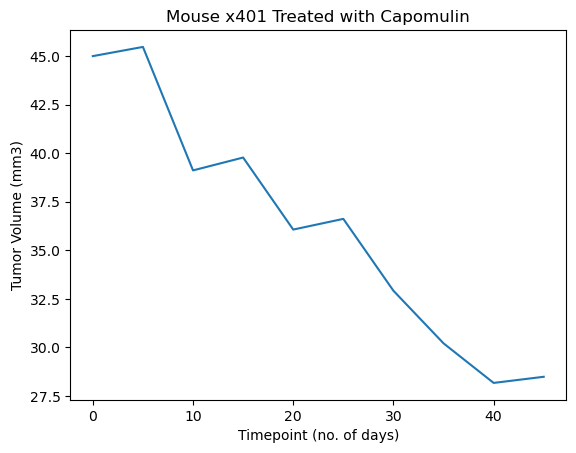

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_line = clean_full_study.loc[clean_full_study["Drug Regimen"] == "Capomulin"]
mouse = capomulin_line.loc[capomulin_line["Mouse ID"] == "x401"]
plt.plot(mouse["Timepoint"], mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (no. of days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse x401 Treated with Capomulin")
plt.show()

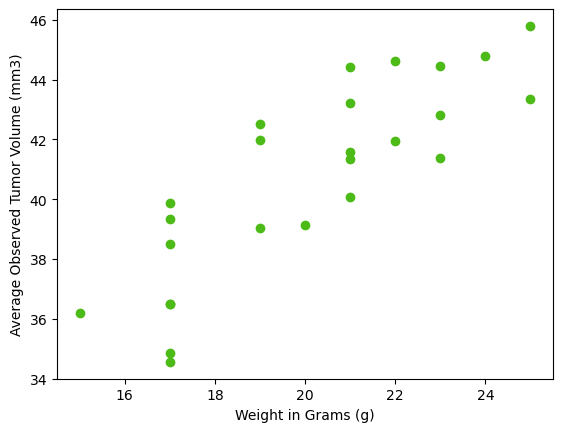

In [26]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_scatter = clean_full_study.loc[clean_full_study["Drug Regimen"] == "Capomulin"]
capomulin_avg = capomulin_scatter.groupby(["Mouse ID"])[["Weight (g)", "Tumor Volume (mm3)"]].mean()
plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"],color = "#4CBB17")
plt.xlabel("Weight in Grams (g)")
plt.ylabel("Average Observed Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between weigh average tumor volume of a mouse is 0.84


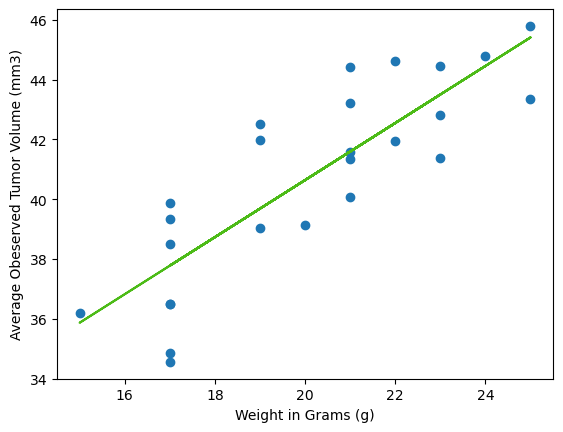

In [34]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = round(st.pearsonr(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])[0],2)
print(f"The correlation between weigh average tumor volume of a mouse is {correlation}")

regression = st.linregress(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
y_values = capomulin_avg["Weight (g)"] * regression[0] + regression[1]
plt.scatter(capomulin_avg["Weight (g)"], capomulin_avg["Tumor Volume (mm3)"])
plt.plot(capomulin_avg["Weight (g)"], y_values, color = "#4CBB17")
plt.xlabel("Weight in Grams (g)")
plt.ylabel("Average Obeserved Tumor Volume (mm3)")
plt.show()